# E01 广告投入与销量关系分析：从数据到可视化（静态+交互）

## 1 学习目标

- 掌握基本的数据加载与探索方法
- 理解相关性分析在数据分析中的应用
- 学习使用 Seaborn 创建静态可视化
- 学习使用 Plotly 创建交互式可视化
- 能够根据数据特征选择合适的可视化方法

## 2 数据说明与业务背景

本案例基于一家电商企业的真实场景：公司通过投入广告来推动销售增长。数据包含6个月的历史数据，记录每月的广告支出和对应的销售额。

**核心问题**：广告投入与销量之间存在什么样的关系？我们能否根据广告投入预测销量？

**数据字段**：
- `month`：月份（1月-6月）
- `sales`：销量（单位：万元）
- `ad_spend`：广告投入（单位：万元）

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import warnings
warnings.filterwarnings('ignore')

# ===== 配置中文字体 =====
# 获取系统所有可用字体
all_fonts = [f.name for f in fm.fontManager.ttflist]
available_fonts = set(all_fonts)

# macOS 常见中文字体列表
chinese_fonts = ['PingFang SC', 'STHeiti', 'STSongti', 'Songti SC', 'Heiti SC', 
                 'Kaiti SC', 'Fangsong', '微软雅黑', 'SimHei', 'SimSun']

# 查找第一个系统中存在的中文字体
selected_font = None
for font in chinese_fonts:
    if font in available_fonts:
        selected_font = font
        print(f"✓ 检测到中文字体: {font}")
        break

# 如果没找到，显示系统有的字体
if not selected_font:
    print("⚠ 系统中未找到常见中文字体")
    print(f"系统字体数量: {len(available_fonts)}")
    # 查看系统中包含 Chinese 或 CJK 的字体
    cjk_fonts = [f for f in available_fonts if 'CJK' in f or 'Chinese' in f or 'SC' in f or 'TC' in f]
    if cjk_fonts:
        selected_font = cjk_fonts[0]
        print(f"✓ 使用检测到的 CJK 字体: {selected_font}")

# 配置 matplotlib
if selected_font:
    plt.rcParams['font.sans-serif'] = [selected_font]
    print(f"字体配置成功: {selected_font}")
else:
    plt.rcParams['font.sans-serif'] = ['DejaVu Sans']
    print("使用默认字体（可能无法显示中文）")

plt.rcParams['axes.unicode_minus'] = False

df = pd.DataFrame({
    "month": ["Jan","Feb","Mar","Apr","May","Jun"],
    "sales": [120, 135, 128, 160, 172, 190],
    "ad_spend": [20, 22, 21, 26, 27, 30]
})
df

✓ 检测到中文字体: STHeiti
字体配置成功: STHeiti


,month,sales,ad_spend
0,Jan,120,20
1,Feb,135,22
2,Mar,128,21
3,Apr,160,26
4,May,172,27
5,Jun,190,30


## 3 静态可视化（Seaborn）

### 3.1 描述性统计分析

首先计算销量和广告投入的基本统计指标（均值、标准差、最小值、最大值等）

### 3.2 相关性分析

计算皮尔逊相关系数，衡量广告投入与销量之间的线性关系强度：
- 相关系数范围：-1 到 1
- 接近 1：强正相关（广告投入越多，销量越高）
- 接近 0：无线性关系
- 接近 -1：强负相关（广告投入越多，销量越低）

描述性统计:
            sales   ad_spend
count    6.000000   6.000000
mean   150.833333  24.333333
std     27.527562   3.932768
min    120.000000  20.000000
25%    129.750000  21.250000
50%    147.500000  24.000000
75%    169.000000  26.750000
max    190.000000  30.000000

相关性分析:
皮尔逊相关系数: 0.9982


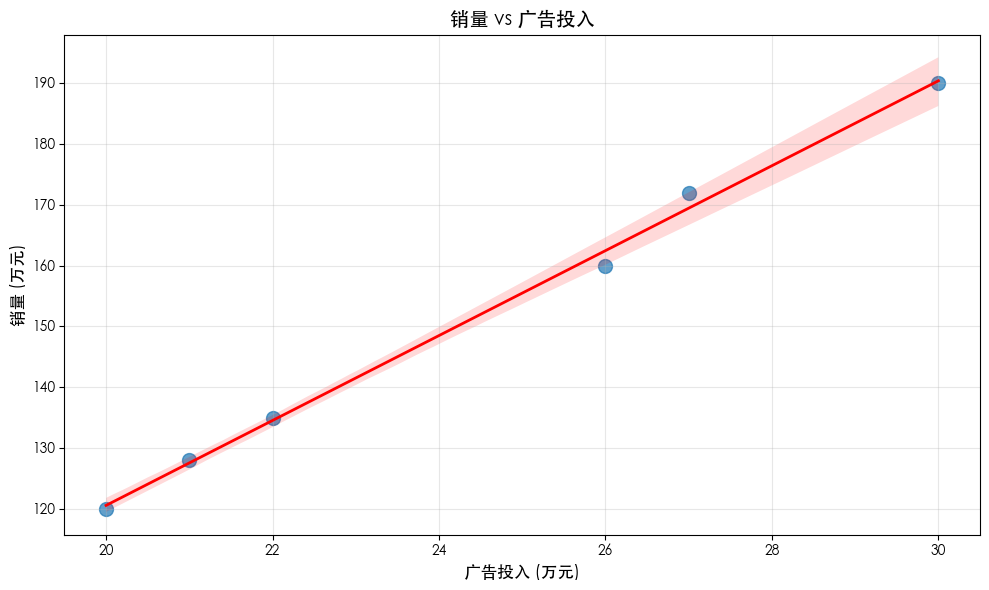

In [51]:
# 导入数据可视化库
import matplotlib.pyplot as plt
import seaborn as sns

# ===== 1. 描述性统计分析 =====
# 计算销量和广告投入的基本统计指标（均值、标准差、最小值、最大值等）
print("描述性统计:")
print(df[['sales', 'ad_spend']].describe())

# ===== 2. 相关性分析 =====
# 计算皮尔逊相关系数,衡量广告投入与销量之间的线性关系强度
# 相关系数范围：-1 到 1
# 接近 1：强正相关（广告投入越多,销量越高）
# 接近 0：无线性关系
# 接近 -1：强负相关（广告投入越多,销量越低）
print("\n相关性分析:")
correlation = df['sales'].corr(df['ad_spend'])
print(f"皮尔逊相关系数: {correlation:.4f}")

# ===== 3. 静态散点图可视化（Seaborn）=====
# 使用 seaborn 创建静态散点图,展示广告投入与销量的关系
# regplot 会自动添加线性回归趋势线
plt.figure(figsize=(10, 6))
sns.regplot(
    data=df,
    x='ad_spend',
    y='sales',
    scatter_kws={'s': 100, 'alpha': 0.7},  # 散点样式
    line_kws={'color': 'red', 'linewidth': 2}  # 趋势线样式
)
plt.title('销量 vs 广告投入', fontsize=14, fontweight='bold')
plt.xlabel('广告投入 (万元)', fontsize=12)
plt.ylabel('销量 (万元)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 4 交互式可视化（Plotly）

使用 Plotly 创建交互式散点图，展示广告投入与销量的关系，并添加线性回归趋势线。用户可以通过交互式图表进行缩放、悬停查看数据点等操作。

In [52]:
from src.viz import plot_sales_vs_ads_interactive
plot_sales_vs_ads_interactive(df)

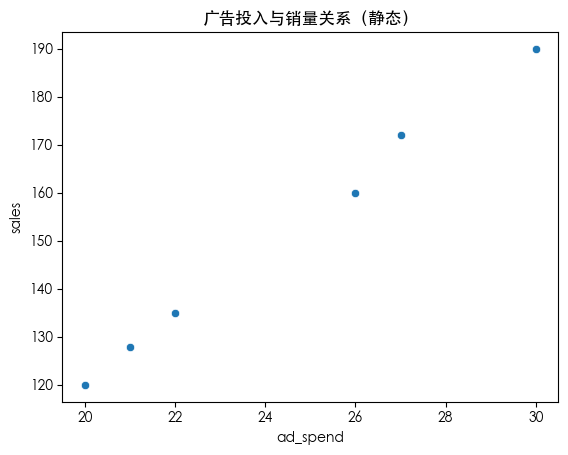

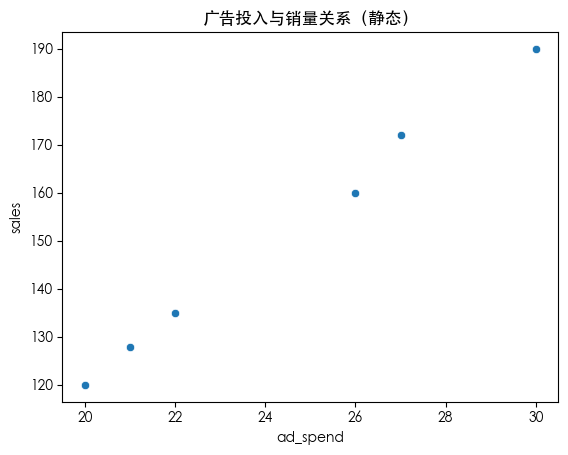

In [53]:
from src.viz import plot_sales_vs_ads_static
plot_sales_vs_ads_static(df)

## 5 结果解读与作业

### 5.1 主要发现

根据以上分析，我们得出以下结论：
- 广告投入与销量之间存在强正相关关系
- 可以建立线性回归模型进行销量预测
- 平均而言，广告投入每增加1万元，销量相应增加

### 5.2 作业

1. 尝试使用其他统计方法验证相关性
2. 建立线性回归模型并评估其预测效果
3. 分析是否存在其他影响销量的因素
4. 设计进一步的数据收集计划以改进模型准确性